In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn import preprocessing

In [2]:
df_election = pd.read_csv("ElectionData.csv")
df_election

,TimeElapsed,time,territoryName,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,...,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates
0,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.50,8874,...,52.66,813743,428546,PS,0,38.29,40.22,147993,94,106
1,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.50,8874,...,52.66,813743,428546,PPD/PSD,0,33.28,34.95,128624,81,77
2,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.50,8874,...,52.66,813743,428546,B.E.,0,6.81,7.15,26307,16,19
3,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.50,8874,...,52.66,813743,428546,CDS-PP,0,4.90,5.14,18923,12,5
4,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.50,8874,...,52.66,813743,428546,PCP-PEV,0,4.59,4.83,17757,11,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21638,265,2019-10-07 00:35:01,Viseu,8,0,277,277,4995,2.81,3700,...,51.28,371931,190712,NC,0,0.19,0.20,332,0,0
21639,265,2019-10-07 00:35:01,Viseu,8,0,277,277,4995,2.81,3700,...,51.28,371931,190712,PNR,0,0.18,0.19,326,0,0
21640,265,2019-10-07 00:35:01,Viseu,8,0,277,277,4995,2.81,3700,...,51.28,371931,190712,MPT,0,0.14,0.15,256,0,0
21641,265,2019-10-07 00:35:01,Viseu,8,0,277,277,4995,2.81,3700,...,51.28,371931,190712,PTP,0,0.13,0.14,239,0,0


In [3]:
df_election.dtypes

TimeElapsed                   int64
time                         object
territoryName                object
totalMandates                 int64
availableMandates             int64
numParishes                   int64
numParishesApproved           int64
blankVotes                    int64
blankVotesPercentage        float64
nullVotes                     int64
nullVotesPercentage         float64
votersPercentage            float64
subscribedVoters              int64
totalVoters                   int64
pre.blankVotes                int64
pre.blankVotesPercentage    float64
pre.nullVotes                 int64
pre.nullVotesPercentage     float64
pre.votersPercentage        float64
pre.subscribedVoters          int64
pre.totalVoters               int64
Party                        object
Mandates                      int64
Percentage                  float64
validVotesPercentage        float64
Votes                         int64
Hondt                         int64
FinalMandates               

In [4]:
df_election.isnull().sum()

TimeElapsed                 0
time                        0
territoryName               0
totalMandates               0
availableMandates           0
numParishes                 0
numParishesApproved         0
blankVotes                  0
blankVotesPercentage        0
nullVotes                   0
nullVotesPercentage         0
votersPercentage            0
subscribedVoters            0
totalVoters                 0
pre.blankVotes              0
pre.blankVotesPercentage    0
pre.nullVotes               0
pre.nullVotesPercentage     0
pre.votersPercentage        0
pre.subscribedVoters        0
pre.totalVoters             0
Party                       0
Mandates                    0
Percentage                  0
validVotesPercentage        0
Votes                       0
Hondt                       0
FinalMandates               0
dtype: int64

# EDA

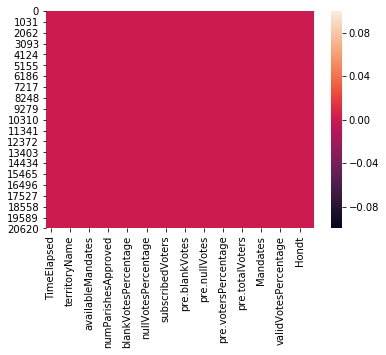

In [5]:
sns.heatmap(df_election.isnull())

In [6]:
label_encoder = preprocessing.LabelEncoder()

In [7]:
df_election['territoryName']=label_encoder.fit_transform(df_election['territoryName'])

In [8]:
df_election

,TimeElapsed,time,territoryName,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,...,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates
0,0,2019-10-06 20:10:02,16,0,226,3092,1081,9652,2.50,8874,...,52.66,813743,428546,PS,0,38.29,40.22,147993,94,106
1,0,2019-10-06 20:10:02,16,0,226,3092,1081,9652,2.50,8874,...,52.66,813743,428546,PPD/PSD,0,33.28,34.95,128624,81,77
2,0,2019-10-06 20:10:02,16,0,226,3092,1081,9652,2.50,8874,...,52.66,813743,428546,B.E.,0,6.81,7.15,26307,16,19
3,0,2019-10-06 20:10:02,16,0,226,3092,1081,9652,2.50,8874,...,52.66,813743,428546,CDS-PP,0,4.90,5.14,18923,12,5
4,0,2019-10-06 20:10:02,16,0,226,3092,1081,9652,2.50,8874,...,52.66,813743,428546,PCP-PEV,0,4.59,4.83,17757,11,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21638,265,2019-10-07 00:35:01,19,8,0,277,277,4995,2.81,3700,...,51.28,371931,190712,NC,0,0.19,0.20,332,0,0
21639,265,2019-10-07 00:35:01,19,8,0,277,277,4995,2.81,3700,...,51.28,371931,190712,PNR,0,0.18,0.19,326,0,0
21640,265,2019-10-07 00:35:01,19,8,0,277,277,4995,2.81,3700,...,51.28,371931,190712,MPT,0,0.14,0.15,256,0,0
21641,265,2019-10-07 00:35:01,19,8,0,277,277,4995,2.81,3700,...,51.28,371931,190712,PTP,0,0.13,0.14,239,0,0


In [9]:
df_election['Party']=label_encoder.fit_transform(df_election['Party'])

In [10]:
df_election.dtypes

TimeElapsed                   int64
time                         object
territoryName                 int64
totalMandates                 int64
availableMandates             int64
numParishes                   int64
numParishesApproved           int64
blankVotes                    int64
blankVotesPercentage        float64
nullVotes                     int64
nullVotesPercentage         float64
votersPercentage            float64
subscribedVoters              int64
totalVoters                   int64
pre.blankVotes                int64
pre.blankVotesPercentage    float64
pre.nullVotes                 int64
pre.nullVotesPercentage     float64
pre.votersPercentage        float64
pre.subscribedVoters          int64
pre.totalVoters               int64
Party                         int64
Mandates                      int64
Percentage                  float64
validVotesPercentage        float64
Votes                         int64
Hondt                         int64
FinalMandates               

In [11]:
df_election['time']=label_encoder.fit_transform(df_election['time'])

In [12]:
df_election

,TimeElapsed,time,territoryName,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,...,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates
0,0,0,16,0,226,3092,1081,9652,2.50,8874,...,52.66,813743,428546,17,0,38.29,40.22,147993,94,106
1,0,0,16,0,226,3092,1081,9652,2.50,8874,...,52.66,813743,428546,15,0,33.28,34.95,128624,81,77
2,0,0,16,0,226,3092,1081,9652,2.50,8874,...,52.66,813743,428546,1,0,6.81,7.15,26307,16,19
3,0,0,16,0,226,3092,1081,9652,2.50,8874,...,52.66,813743,428546,2,0,4.90,5.14,18923,12,5
4,0,0,16,0,226,3092,1081,9652,2.50,8874,...,52.66,813743,428546,11,0,4.59,4.83,17757,11,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21638,265,53,19,8,0,277,277,4995,2.81,3700,...,51.28,371931,190712,9,0,0.19,0.20,332,0,0
21639,265,53,19,8,0,277,277,4995,2.81,3700,...,51.28,371931,190712,14,0,0.18,0.19,326,0,0
21640,265,53,19,8,0,277,277,4995,2.81,3700,...,51.28,371931,190712,8,0,0.14,0.15,256,0,0
21641,265,53,19,8,0,277,277,4995,2.81,3700,...,51.28,371931,190712,18,0,0.13,0.14,239,0,0


In [13]:
df_election.dtypes

TimeElapsed                   int64
time                          int64
territoryName                 int64
totalMandates                 int64
availableMandates             int64
numParishes                   int64
numParishesApproved           int64
blankVotes                    int64
blankVotesPercentage        float64
nullVotes                     int64
nullVotesPercentage         float64
votersPercentage            float64
subscribedVoters              int64
totalVoters                   int64
pre.blankVotes                int64
pre.blankVotesPercentage    float64
pre.nullVotes                 int64
pre.nullVotesPercentage     float64
pre.votersPercentage        float64
pre.subscribedVoters          int64
pre.totalVoters               int64
Party                         int64
Mandates                      int64
Percentage                  float64
validVotesPercentage        float64
Votes                         int64
Hondt                         int64
FinalMandates               

In [14]:
df_election.skew()

TimeElapsed                 -0.005496
time                        -0.005496
territoryName               -0.025884
totalMandates                5.150031
availableMandates            5.131572
numParishes                  3.920433
numParishesApproved          4.238343
blankVotes                   4.521940
blankVotesPercentage         0.069627
nullVotes                    4.520945
nullVotesPercentage          0.855419
votersPercentage            -1.158029
subscribedVoters             4.568797
totalVoters                  4.541364
pre.blankVotes               4.551489
pre.blankVotesPercentage     0.021609
pre.nullVotes                4.563235
pre.nullVotesPercentage      1.231109
pre.votersPercentage        -0.779289
pre.subscribedVoters         4.565085
pre.totalVoters              4.548030
Party                       -0.083536
Mandates                    16.576658
Percentage                   2.542328
validVotesPercentage         2.543122
Votes                       13.940573
Hondt       

In [15]:
from scipy.stats import zscore
z_score=abs(zscore(df_election))
print(df_election.shape)
df_election_final=df_election.loc[(z_score<3).all(axis=1)]
print(df_election_final.shape)

(21643, 28)
(18333, 28)


In [16]:
df_election_final.skew()

TimeElapsed                -0.024110
time                       -0.024110
territoryName               0.034073
totalMandates               2.542453
availableMandates           2.593527
numParishes                 0.585363
numParishesApproved         0.619329
blankVotes                  1.800122
blankVotesPercentage       -0.844508
nullVotes                   2.103352
nullVotesPercentage         0.564426
votersPercentage           -0.392023
subscribedVoters            2.407541
totalVoters                 2.468630
pre.blankVotes              2.034860
pre.blankVotesPercentage   -0.410446
pre.nullVotes               2.340000
pre.nullVotesPercentage     1.033803
pre.votersPercentage       -0.514215
pre.subscribedVoters        2.370988
pre.totalVoters             2.468950
Party                       0.009657
Mandates                    7.177093
Percentage                  3.373567
validVotesPercentage        3.383145
Votes                       7.310058
Hondt                       7.012845
F

In [17]:
df_x=df_election_final.drop(columns=["FinalMandates"])
y=pd.DataFrame(df_election_final["FinalMandates"])

In [18]:
df_x

,TimeElapsed,time,territoryName,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,...,pre.nullVotesPercentage,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Percentage,validVotesPercentage,Votes,Hondt
22,0,0,0,0,16,147,12,186,2.92,101,...,1.63,54.56,12511,6826,17,0,34.33,35.95,2187,7
23,0,0,0,0,16,147,12,186,2.92,101,...,1.63,54.56,12511,6826,1,0,7.47,7.82,476,1
24,0,0,0,0,16,147,12,186,2.92,101,...,1.63,54.56,12511,6826,2,0,6.14,6.43,391,1
25,0,0,0,0,16,147,12,186,2.92,101,...,1.63,54.56,12511,6826,11,0,2.39,2.50,152,0
26,0,0,0,0,16,147,12,186,2.92,101,...,1.63,54.56,12511,6826,10,0,2.04,2.14,130,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21638,265,53,19,8,0,277,277,4995,2.81,3700,...,1.90,51.28,371931,190712,9,0,0.19,0.20,332,0
21639,265,53,19,8,0,277,277,4995,2.81,3700,...,1.90,51.28,371931,190712,14,0,0.18,0.19,326,0
21640,265,53,19,8,0,277,277,4995,2.81,3700,...,1.90,51.28,371931,190712,8,0,0.14,0.15,256,0
21641,265,53,19,8,0,277,277,4995,2.81,3700,...,1.90,51.28,371931,190712,18,0,0.13,0.14,239,0


In [19]:
y

,FinalMandates
22,7
23,2
24,1
25,0
26,0
...,...
21638,0
21639,0
21640,0
21641,0


In [20]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x = sc.fit_transform(df_x)
x = pd.DataFrame(x,columns=df_x.columns)

In [21]:
x

,TimeElapsed,time,territoryName,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,...,pre.nullVotesPercentage,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Percentage,validVotesPercentage,Votes,Hondt
0,-1.752045,-1.752045,-1.741356,-0.767282,0.979379,-0.099227,-1.394293,-0.875510,0.540356,-0.950770,...,-0.375814,-0.133418,-0.900191,-0.845089,1.177919,-0.206043,4.612609,4.603604,-0.190208,4.560088
1,-1.752045,-1.752045,-1.741356,-0.767282,0.979379,-0.099227,-1.394293,-0.875510,0.540356,-0.950770,...,-0.375814,-0.133418,-0.900191,-0.845089,-1.435236,-0.206043,0.644624,0.642757,-0.282371,0.445033
2,-1.752045,-1.752045,-1.741356,-0.767282,0.979379,-0.099227,-1.394293,-0.875510,0.540356,-0.950770,...,-0.375814,-0.133418,-0.900191,-0.845089,-1.271914,-0.206043,0.448145,0.447038,-0.286949,0.445033
3,-1.752045,-1.752045,-1.741356,-0.767282,0.979379,-0.099227,-1.394293,-0.875510,0.540356,-0.950770,...,-0.375814,-0.133418,-0.900191,-0.845089,0.197986,-0.206043,-0.105837,-0.106326,-0.299823,-0.240810
4,-1.752045,-1.752045,-1.741356,-0.767282,0.979379,-0.099227,-1.394293,-0.875510,0.540356,-0.950770,...,-0.375814,-0.133418,-0.900191,-0.845089,0.034664,-0.206043,-0.157542,-0.157016,-0.301008,-0.240810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18328,1.691384,1.691384,1.508735,0.229491,-0.590067,1.489023,1.671709,0.057648,0.376728,0.124119,...,0.326796,-0.884032,0.094377,-0.005666,-0.128659,-0.206043,-0.430839,-0.430178,-0.290127,-0.240810
18329,1.691384,1.691384,1.508735,0.229491,-0.590067,1.489023,1.671709,0.057648,0.376728,0.124119,...,0.326796,-0.884032,0.094377,-0.005666,0.687952,-0.206043,-0.432317,-0.431586,-0.290450,-0.240810
18330,1.691384,1.691384,1.508735,0.229491,-0.590067,1.489023,1.671709,0.057648,0.376728,0.124119,...,0.326796,-0.884032,0.094377,-0.005666,-0.291981,-0.206043,-0.438226,-0.437218,-0.294221,-0.240810
18331,1.691384,1.691384,1.508735,0.229491,-0.590067,1.489023,1.671709,0.057648,0.376728,0.124119,...,0.326796,-0.884032,0.094377,-0.005666,1.341241,-0.206043,-0.439703,-0.438626,-0.295136,-0.240810


In [22]:
y

,FinalMandates
22,7
23,2
24,1
25,0
26,0
...,...
21638,0
21639,0
21640,0
21641,0


# Modelling

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model
def maxr2_score(regr,x,y):
    max_r_score=0
    for r_state in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.20)
        regr.fit(x_train,y_train)
        y_pred = regr.predict(x_test)
        r2_scr = r2_score(y_test,y_pred)
        print("r2 score corresponding to random state: ",r_state,"is: ",r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state 
    print("max r2 score corresponding to",final_r_state," is ",max_r_score)
    return final_r_state

In [24]:
from sklearn.linear_model import LinearRegression
lreg=LinearRegression()
r_state=maxr2_score(lreg,x,y)

r2 score corresponding to random state:  42 is:  0.9847314696256859
r2 score corresponding to random state:  43 is:  0.9874410743298249
r2 score corresponding to random state:  44 is:  0.9879502090393173
r2 score corresponding to random state:  45 is:  0.9850635760328039
r2 score corresponding to random state:  46 is:  0.9875572270590472
r2 score corresponding to random state:  47 is:  0.9905663085824371
r2 score corresponding to random state:  48 is:  0.983936390352911
r2 score corresponding to random state:  49 is:  0.9831248779513154
r2 score corresponding to random state:  50 is:  0.9852491057690961
r2 score corresponding to random state:  51 is:  0.9837985508536059
r2 score corresponding to random state:  52 is:  0.9844470256914967
r2 score corresponding to random state:  53 is:  0.9862900482710119
r2 score corresponding to random state:  54 is:  0.9810410342603072
r2 score corresponding to random state:  55 is:  0.9822268134555869
r2 score corresponding to random state:  56 is:  

In [25]:
from sklearn.model_selection import cross_val_score
cross_val_score(linear_model.LinearRegression(),x,y,cv=10,scoring="r2").mean()

0.9884721285757928

In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
neighbors={"n_neighbors":range(1,30)}
knr=KNeighborsRegressor()
gknr = GridSearchCV(knr, neighbors, cv=10)
gknr.fit(x,y)
gknr.best_params_

{'n_neighbors': 1}

In [27]:
knr=KNeighborsRegressor(n_neighbors=1)
r_state=maxr2_score(knr,x,y)

r2 score corresponding to random state:  42 is:  0.9991328836666606
r2 score corresponding to random state:  43 is:  0.9997232138860732
r2 score corresponding to random state:  44 is:  0.9990345818941135
r2 score corresponding to random state:  45 is:  0.9996100270652064
r2 score corresponding to random state:  46 is:  0.9993608021645223
r2 score corresponding to random state:  47 is:  0.9990484893055883
r2 score corresponding to random state:  48 is:  0.9994121610838935
r2 score corresponding to random state:  49 is:  0.9988997785080418
r2 score corresponding to random state:  50 is:  0.9989652990009366
r2 score corresponding to random state:  51 is:  0.9984439818618723
r2 score corresponding to random state:  52 is:  0.9990174614805781
r2 score corresponding to random state:  53 is:  0.9991271333698317
r2 score corresponding to random state:  54 is:  0.9992550193654334
r2 score corresponding to random state:  55 is:  0.9988033215577281
r2 score corresponding to random state:  56 is: 

In [28]:
from sklearn.model_selection import cross_val_score
print("Mean r2score for Linear Regression: ",cross_val_score(lreg,x,y,cv=5,scoring="r2").mean())
print("Standard deviation in r2 score for Linear Regression: ",cross_val_score(lreg,x,y,cv=5,scoring="r2").std())
print()
print("Mean r2score for KNN Regression: ",cross_val_score(knr,x,y,cv=5,scoring="r2").mean())
print("Standard deviation in r2 score for KNN Regression: ",cross_val_score(knr,x,y,cv=5,scoring="r2").std())

Mean r2score for Linear Regression:  0.9881700842030737
Standard deviation in r2 score for Linear Regression:  0.01432218852602983

Mean r2score for KNN Regression:  0.9818435725487958
Standard deviation in r2 score for KNN Regression:  0.027920276123130857


In [29]:
from sklearn.linear_model import Lasso
lsreg=Lasso()
parameters={"alpha":[0.001,0.01,0.1,1]}
glsr = GridSearchCV(lsreg, parameters, cv=10)
glsr.fit(x,y)
glsr.best_params_

{'alpha': 0.001}

In [30]:
lsreg=Lasso(alpha=0.001)
r_state=maxr2_score(lsreg,x,y)

r2 score corresponding to random state:  42 is:  0.9845948109436421
r2 score corresponding to random state:  43 is:  0.9874222477394597
r2 score corresponding to random state:  44 is:  0.987891996438995
r2 score corresponding to random state:  45 is:  0.9849590161362959
r2 score corresponding to random state:  46 is:  0.9875565000446558
r2 score corresponding to random state:  47 is:  0.9906050927714107
r2 score corresponding to random state:  48 is:  0.9837800004007348
r2 score corresponding to random state:  49 is:  0.9829877341531149
r2 score corresponding to random state:  50 is:  0.9851862732175202
r2 score corresponding to random state:  51 is:  0.9837011092883478
r2 score corresponding to random state:  52 is:  0.984343352801038
r2 score corresponding to random state:  53 is:  0.9861937828217255
r2 score corresponding to random state:  54 is:  0.9810182769976795
r2 score corresponding to random state:  55 is:  0.9820806119067952
r2 score corresponding to random state:  56 is:  0

In [31]:
print("Mean r2score for Lasso Regression: ",cross_val_score(lsreg,x,y,cv=5,scoring="r2").mean())
print("Standard deviation in r2 score for Lasso Regression: ",cross_val_score(lsreg,x,y,cv=5,scoring="r2").std())

Mean r2score for Lasso Regression:  0.9881015873027483
Standard deviation in r2 score for Lasso Regression:  0.014462428738858285


In [32]:
from sklearn.ensemble import GradientBoostingRegressor
import warnings
warnings.filterwarnings("ignore")
gbr=GradientBoostingRegressor()
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,100,500,1000]}
ggbr = GridSearchCV(gbr, parameters, cv=5)
ggbr.fit(x,y)
ggbr.best_params_

{'learning_rate': 1, 'n_estimators': 100}

In [33]:
gbr=GradientBoostingRegressor(learning_rate=0.1,n_estimators=500)
print("Mean r2score for gradient boosting Regression: ",cross_val_score(gbr,x,y,cv=5,scoring="r2").mean())
print("Standard deviation in r2 score for Gradient Boosting Regression: ",cross_val_score(gbr,x,y,cv=5,scoring="r2").std())

Mean r2score for gradient boosting Regression:  0.9841127644833755
Standard deviation in r2 score for Gradient Boosting Regression:  0.02493461120542651


In [34]:
r_state=maxr2_score(gbr,x,y)

r2 score corresponding to random state:  42 is:  0.9989812352812503
r2 score corresponding to random state:  43 is:  0.9991205764883541
r2 score corresponding to random state:  44 is:  0.9990024697714278
r2 score corresponding to random state:  45 is:  0.9992034090496346
r2 score corresponding to random state:  46 is:  0.9991238236209817
r2 score corresponding to random state:  47 is:  0.9995980741329434
r2 score corresponding to random state:  48 is:  0.998781084941097
r2 score corresponding to random state:  49 is:  0.9990894849713519
r2 score corresponding to random state:  50 is:  0.9991334026801437
r2 score corresponding to random state:  51 is:  0.9987816535957551
r2 score corresponding to random state:  52 is:  0.9989876200665979
r2 score corresponding to random state:  53 is:  0.9991213744392097
r2 score corresponding to random state:  54 is:  0.9990440108033559
r2 score corresponding to random state:  55 is:  0.9988622455367727
r2 score corresponding to random state:  56 is:  

# Model Selection